In [537]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Malaria Dataset with temperature and wind values

In [538]:
malaria_df = pd.read_excel('D:\VIT\SEM 6\Data Visualization\Project\MALARIA-CHENGALPET.xlsx',sheet_name='Sheet6')
malaria_df.head(10)

,MONTH,WEEK,HUMIDITY (%),MOSQUITO,SPECIES,MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE
0,January,1,78.9,Pv,imported,True,False,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2
1,January,2,78.9,Pv,indigenious,False,True,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0
2,January,3,78.9,Pf,indigenious,False,False,False,True,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0
3,January,4,78.9,Pf,imported,False,False,True,False,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3
4,February,1,76.3,Pv,imported,True,False,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0
5,February,2,76.3,Pv,indigenious,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1
6,February,3,76.3,Pf,indigenious,False,False,False,True,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0
7,February,4,76.3,Pv,indigenious,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0
8,March,1,73.9,Pv,indigenious,False,True,False,False,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0
9,March,2,73.9,Pf,imported,False,False,True,False,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0


In [539]:
malaria_df.info

<bound method DataFrame.info of          MONTH  WEEK  HUMIDITY (%) MOSQUITO      SPECIES  MOSQUITO1  \
0      January     1          78.9       Pv     imported       True   
1      January     2          78.9       Pv  indigenious      False   
2      January     3          78.9       Pf  indigenious      False   
3      January     4          78.9       Pf     imported      False   
4     February     1          76.3       Pv     imported       True   
..         ...   ...           ...      ...          ...        ...   
607     August     4          78.1       Pv     imported       True   
608  September     1          77.4       Pv     imported       True   
609  September     2          77.4       Pf     imported      False   
610  September     3          77.4       Pv  indigenious      False   
611  September     4          77.4       Pf     imported      False   

     MOSQUITO2  MOSQUITO3  MOSQUITO4  MAX TEMP (deg F)  AVG TEMP  MIN TEMP  \
0        False      False      False 

In [540]:
malaria_df.dtypes

MONTH                  object
WEEK                    int64
HUMIDITY (%)          float64
MOSQUITO               object
SPECIES                object
MOSQUITO1                bool
MOSQUITO2                bool
MOSQUITO3                bool
MOSQUITO4                bool
MAX TEMP (deg F)      float64
AVG TEMP              float64
MIN TEMP              float64
DEW POINT (deg F)     float64
PRECIPITATION (in)    float64
# RAINY DAYS            int64
WIND (mph)            float64
AGE CATEGORY            int64
MALE                    int64
FEMALE                  int64
dtype: object

In [541]:
malaria_df.describe()

,WEEK,HUMIDITY (%),MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,2.500000,72.777124,92.174641,84.217320,77.114771,73.838693,146.457908,4.732026,6.994641,3.460784,2.905229,0.830065
std,1.118949,6.638207,4.907372,4.134925,4.144015,3.086807,182.088449,5.092926,1.563160,1.434927,2.730234,1.162935
min,1.000000,53.900000,82.260000,76.620000,67.900000,66.030000,0.000000,0.000000,4.110000,1.000000,0.000000,0.000000
25%,1.750000,68.700000,88.000000,80.240000,73.940000,72.090000,18.140000,1.000000,5.740000,2.000000,0.000000,0.000000
50%,2.500000,72.700000,92.400000,84.750000,77.680000,74.160000,79.900000,3.000000,6.840000,3.000000,2.000000,0.000000
75%,3.250000,77.400000,95.710000,87.100000,80.290000,76.050000,222.600000,7.000000,8.270000,5.000000,5.000000,1.000000
max,4.000000,89.000000,103.630000,92.710000,85.870000,80.780000,1040.050000,20.000000,10.450000,5.000000,10.000000,5.000000


In [542]:
malaria_df.isnull()

,MONTH,WEEK,HUMIDITY (%),MOSQUITO,SPECIES,MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:xlabel='SPECIES', ylabel='count'>

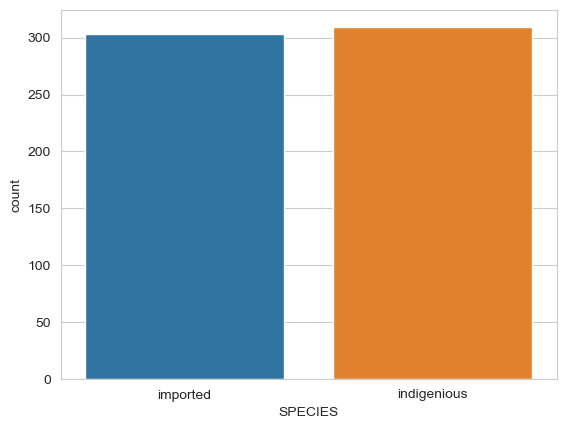

In [543]:
#for indigenious or imported
sns.set_style('whitegrid')
sns.countplot(x='SPECIES',data=malaria_df)


<AxesSubplot:xlabel='MOSQUITO', ylabel='count'>

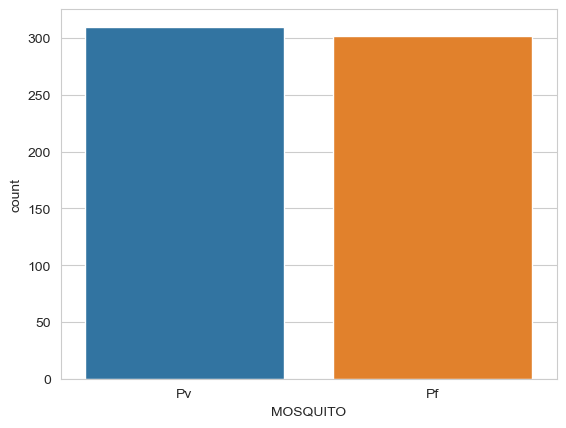

In [544]:
#for Pv or Pf
sns.set_style('whitegrid')
sns.countplot(x='MOSQUITO',data=malaria_df)

<AxesSubplot:>

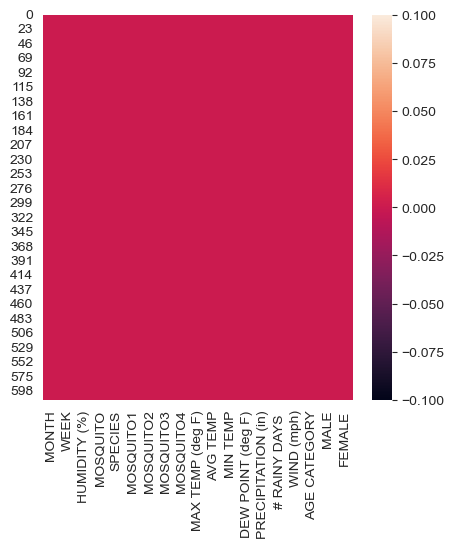

In [545]:
plt.figure(figsize=(5,5))
sns.heatmap(malaria_df.isnull())

In [546]:
cor=malaria_df.corr()
cor

,WEEK,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE
WEEK,1.000000e+00,-8.826218e-17,-0.006858,-0.013199,0.001673,0.018905,-7.174129e-17,-1.834823e-16,-1.285321e-16,-2.887111e-16,1.465722e-16,1.754971e-16,-1.153130e-16,0.009174,0.004822,0.027670
HUMIDITY (%),-8.826218e-17,1.000000e+00,0.014011,-0.033511,-0.032102,0.053834,-7.391341e-01,-6.486623e-01,-4.559551e-01,1.078341e-01,5.007063e-01,3.269386e-01,-6.720520e-01,0.002483,0.306355,0.208006
MOSQUITO1,-6.858128e-03,1.401087e-02,1.000000,-0.338662,-0.328797,-0.311895,4.610123e-02,6.469686e-02,7.729734e-02,9.786359e-02,5.868846e-02,8.823989e-02,5.174924e-02,-0.038170,0.008202,-0.000625
MOSQUITO2,-1.319909e-02,-3.351110e-02,-0.338662,1.000000,-0.355408,-0.337139,1.677051e-03,-2.375710e-03,-1.544307e-02,-4.178815e-02,1.586021e-02,1.373674e-02,7.768703e-03,0.037134,0.000734,-0.063914
MOSQUITO3,1.673245e-03,-3.210154e-02,-0.328797,-0.355408,1.000000,-0.327318,-7.009049e-04,-1.263234e-02,-1.073399e-02,-3.938242e-02,-7.297855e-02,-7.347167e-02,-2.284962e-02,-0.021772,-0.070113,0.066587
MOSQUITO4,1.890450e-02,5.383405e-02,-0.311895,-0.337139,-0.327318,1.000000,-4.723736e-02,-4.940070e-02,-5.036929e-02,-1.411727e-02,-3.917398e-04,-2.729474e-02,-3.649510e-02,0.021942,0.063027,-0.001189
MAX TEMP (deg F),-7.174129e-17,-7.391341e-01,0.046101,0.001677,-0.000701,-0.047237,1.000000e+00,9.785827e-01,8.603635e-01,5.672210e-01,-2.855081e-01,-1.236253e-01,8.363992e-01,0.005090,-0.298366,-0.184335
AVG TEMP,-1.834823e-16,-6.486623e-01,0.064697,-0.002376,-0.012632,-0.049401,9.785827e-01,1.000000e+00,9.136093e-01,6.837549e-01,-1.786533e-01,-2.087512e-02,8.398665e-01,0.010583,-0.233592,-0.142096
MIN TEMP,-1.285321e-16,-4.559551e-01,0.077297,-0.015443,-0.010734,-0.050369,8.603635e-01,9.136093e-01,1.000000e+00,7.491749e-01,-1.793882e-02,1.017943e-01,7.517845e-01,0.012013,-0.157724,-0.076129
DEW POINT (deg F),-2.887111e-16,1.078341e-01,0.097864,-0.041788,-0.039382,-0.014117,5.672210e-01,6.837549e-01,7.491749e-01,1.000000e+00,2.138890e-01,2.626825e-01,4.509274e-01,0.020222,-0.009692,0.015658


<AxesSubplot:>

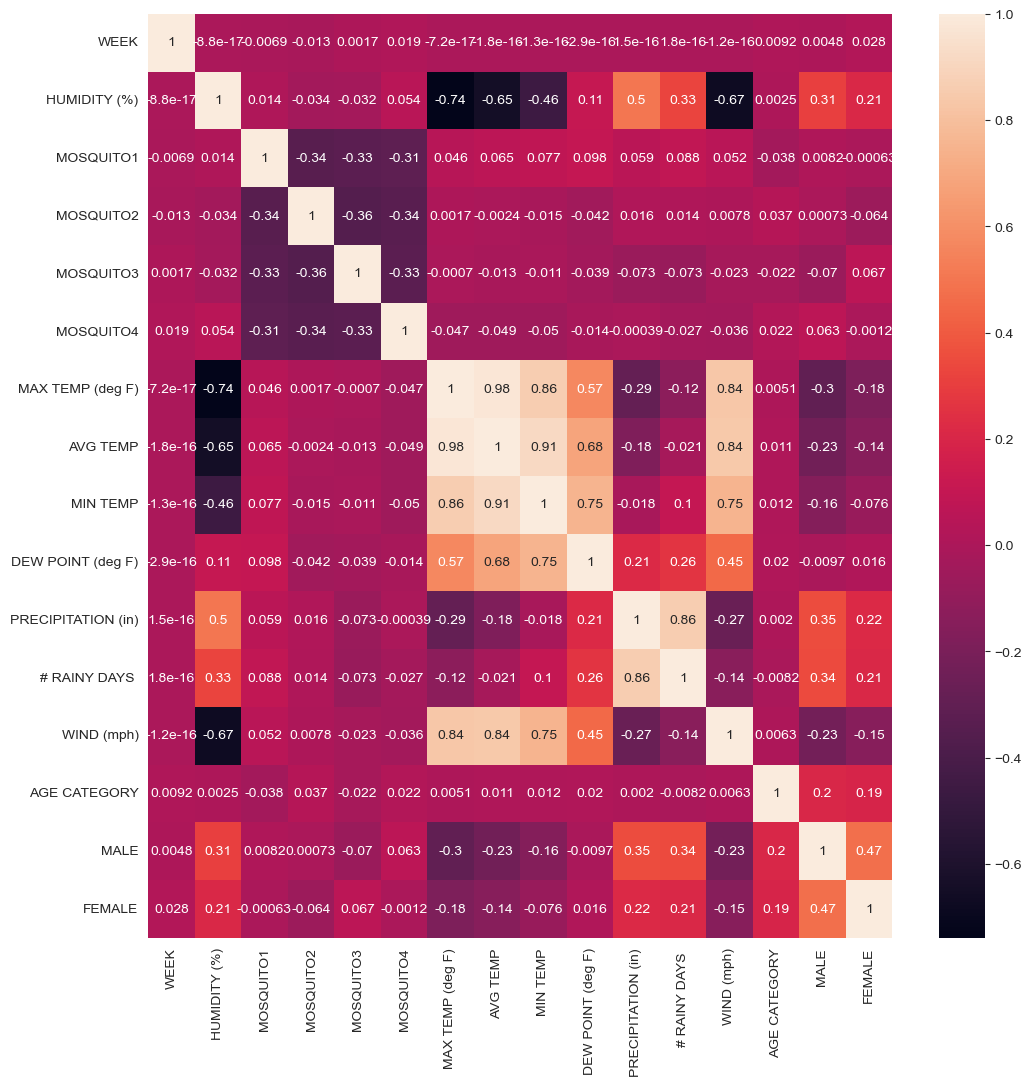

In [547]:
plt.figure(figsize=(12,12))
sns.heatmap(malaria_df.corr(),annot=True)

We can see from the heatmap above that most of the features have high correlation values between them except for the following combinations:
1) Max temp with Avg temp
2) Wind with Max temp
3) Dew point with Min temp

<AxesSubplot:>

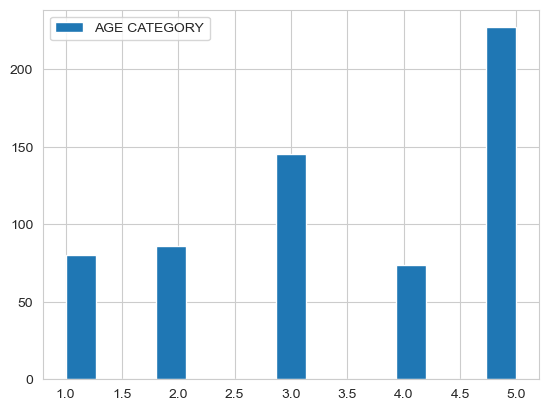

In [548]:
malaria_df['AGE CATEGORY'].hist(bins=15,legend='True')

### Converting categoraical values to Binary

In [549]:
mosquito = pd.get_dummies(malaria_df['MOSQUITO'],drop_first=True)
malaria_df.drop('MOSQUITO',axis=1,inplace=True)
malaria_df=pd.concat([malaria_df,mosquito],axis=1)
malaria_df.head(10)

#Pv = 1 and Pf = 0 

,MONTH,WEEK,HUMIDITY (%),SPECIES,MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
0,January,1,78.9,imported,True,False,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,1
1,January,2,78.9,indigenious,False,True,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,1
2,January,3,78.9,indigenious,False,False,False,True,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,0
3,January,4,78.9,imported,False,False,True,False,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,0
4,February,1,76.3,imported,True,False,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,1
5,February,2,76.3,indigenious,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1,1
6,February,3,76.3,indigenious,False,False,False,True,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0,0
7,February,4,76.3,indigenious,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0,1
8,March,1,73.9,indigenious,False,True,False,False,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0,1
9,March,2,73.9,imported,False,False,True,False,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0,0


In [550]:
species = pd.get_dummies(malaria_df['SPECIES'],drop_first=True)
malaria_df.drop('SPECIES',axis=1,inplace=True)
malaria_df=pd.concat([malaria_df,species],axis=1)
malaria_df.head(10)
#Converting the categorical values under species column into binary (Indigenious = 1 and Imported = 0)

,MONTH,WEEK,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv,indigenious
0,January,1,78.9,True,False,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,1,0
1,January,2,78.9,False,True,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,1,1
2,January,3,78.9,False,False,False,True,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,0,1
3,January,4,78.9,False,False,True,False,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,0,0
4,February,1,76.3,True,False,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,1,0
5,February,2,76.3,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1,1,1
6,February,3,76.3,False,False,False,True,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0,0,1
7,February,4,76.3,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0,1,1
8,March,1,73.9,False,True,False,False,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0,1,1
9,March,2,73.9,False,False,True,False,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0,0,0


Here we separate the predicted column into Y and the other columns into X

In [551]:
X = malaria_df.drop(['indigenious','MONTH','WEEK'],axis=1)
X.head(10)

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
0,78.9,True,False,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,3,2,1
1,78.9,False,True,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,3,2,0,1
2,78.9,False,False,False,True,84.19,77.32,70.94,69.86,41.7,3,5.49,3,0,0,0
3,78.9,False,False,True,False,84.19,77.32,70.94,69.86,41.7,3,5.49,5,3,3,0
4,76.3,True,False,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,0,1
5,76.3,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,5,1,1,1
6,76.3,False,False,False,True,86.82,79.36,71.86,70.66,0.0,0,5.72,3,2,0,0
7,76.3,False,True,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,3,1,0,1
8,73.9,False,True,False,False,93.26,84.19,75.87,74.09,1.3,0,7.06,3,0,0,1
9,73.9,False,False,True,False,93.26,84.19,75.87,74.09,1.3,0,7.06,5,0,0,0


In [552]:
#X=malaria_df[['CHENGALPET WARD NO','NO OF CASES','MIN NO OF CASES','AGE CATEGORY','NO OF DEATHS','BODY TEMP','Pv','RAINY','MALE','FEMALE']]
#X

In [553]:
y=malaria_df['indigenious']
y

0      0
1      1
2      1
3      0
4      0
      ..
607    0
608    0
609    0
610    1
611    0
Name: indigenious, Length: 612, dtype: uint8

# Splitting the Dataset into Training and Testing
Here we spllit the Dataset into Training and Testing sets
According to the parameters provided, we reserve 80% of the Data for Training and the remaining 20% is for testing

In [554]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

Fit the training set that allows the model to learn the given data

### Logistic Regression

In [555]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=500)
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [556]:
predictions= log_model.predict(X_test)
predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=uint8)

### Evaluating the results (predicted values)
We use certian metrics to evaluate the results obtained and find important parameters such as - Accuracy score, confusion matrix, precision, recall, and F1 Score

Here we have got 100% accuracy with the sheet 6 which has the weather details

### Evaluating the Obtained Results
We use Certain Metrics to evaluate the Results obtained and find important parameters such as - Accuracy Score, Confusion Matrix, Precision, Recall, and F1 Score

In [557]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,predictions)
score

1.0

In [558]:
from sklearn.metrics import precision_score
precision_positive = precision_score(y_test, predictions, pos_label=1)
precision_negative = precision_score(y_test, predictions, pos_label=0)
precision_positive, precision_negative 

(1.0, 1.0)

In [559]:
from sklearn.metrics import recall_score
recall_sensitivity = recall_score(y_test, predictions, pos_label=1)
recall_specificity = recall_score(y_test, predictions, pos_label=0)
recall_sensitivity, recall_specificity

(1.0, 1.0)

[[63  0]
 [ 0 60]]


C:\Users\ancha\AppData\Local\Temp\ipykernel_19588\4261913112.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\ancha\AppData\Local\Temp\ipykernel_19588\4261913112.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


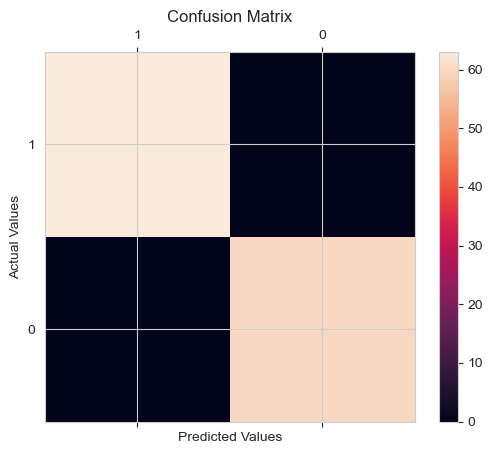

In [560]:
from sklearn.metrics import confusion_matrix
labels = [1,0]
matrix = confusion_matrix(y_test,predictions)
print(matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
plt.title('Confusion Matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#### Classification report

In [561]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        60

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



### Naive Bayes Classification

#### Naive Bayes 

In [562]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [563]:
naive_predictions = model.predict(X_test)
naive_predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=uint8)

### Evaluating the Obtained Results

In [564]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,naive_predictions)
score

1.0

In [565]:
from sklearn.metrics import precision_score
precision_positive = precision_score(y_test, naive_predictions, pos_label=1)
precision_negative = precision_score(y_test, naive_predictions, pos_label=0)
precision_positive, precision_negative 

(1.0, 1.0)

In [566]:
from sklearn.metrics import recall_score
recall_sensitivity = recall_score(y_test, naive_predictions, pos_label=1)
recall_specificity = recall_score(y_test, naive_predictions, pos_label=0)
recall_sensitivity, recall_specificity

(1.0, 1.0)

[[63  0]
 [ 0 60]]


C:\Users\ancha\AppData\Local\Temp\ipykernel_19588\49158463.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\ancha\AppData\Local\Temp\ipykernel_19588\49158463.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


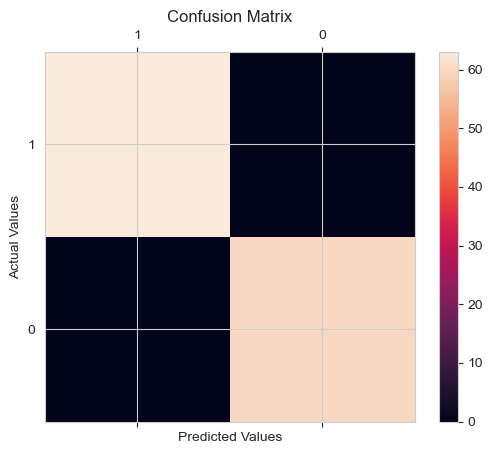

In [567]:
from sklearn.metrics import confusion_matrix
labels = [1,0]
matrix = confusion_matrix(y_test,naive_predictions)
print(matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
plt.title('Confusion Matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [568]:
from sklearn.metrics import classification_report
report = classification_report(y_test,naive_predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        60

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



### KNN-Clustering

In [569]:
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,pred))
    

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [570]:
accuracy

[0.5934959349593496,
 0.5284552845528455,
 0.5609756097560976,
 0.5284552845528455,
 0.5528455284552846,
 0.5121951219512195,
 0.5203252032520326,
 0.5447154471544715,
 0.5447154471544715,
 0.5528455284552846,
 0.5447154471544715,
 0.5203252032520326,
 0.5447154471544715,
 0.5528455284552846,
 0.5772357723577236,
 0.5772357723577236,
 0.5609756097560976,
 0.5447154471544715,
 0.5365853658536586,
 0.5853658536585366,
 0.5609756097560976,
 0.6097560975609756,
 0.5772357723577236,
 0.5934959349593496,
 0.5365853658536586,
 0.5691056910569106,
 0.5447154471544715,
 0.5691056910569106,
 0.5691056910569106,
 0.5528455284552846,
 0.5365853658536586,
 0.5609756097560976,
 0.5528455284552846,
 0.5691056910569106,
 0.5609756097560976,
 0.5853658536585366,
 0.5528455284552846,
 0.5609756097560976,
 0.5203252032520326]

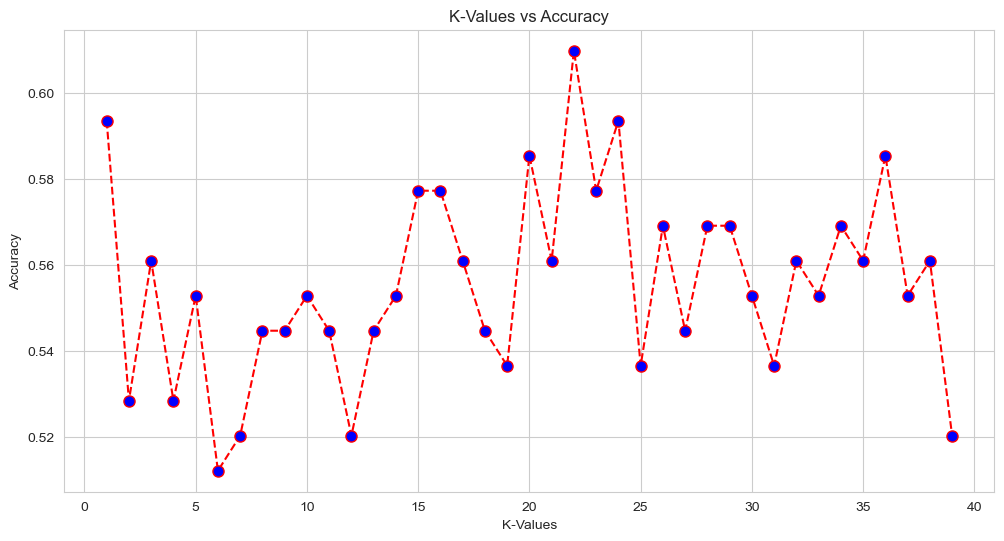

In [571]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),accuracy,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=8)
plt.title('K-Values vs Accuracy')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.show()

In [572]:
knnmodel = KNeighborsClassifier(n_neighbors=22)
knnmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [573]:
knn_pred = knnmodel.predict(X_test)
knn_pred

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0], dtype=uint8)

### Evaluating the Obtained Results

In [574]:
acc = accuracy_score(knn_pred, y_test)
acc

0.6097560975609756

In [575]:
precision_positive = precision_score(y_test, knn_pred, pos_label=1)
precision_negative = precision_score(y_test, knn_pred, pos_label=0)
precision_positive, precision_negative 

(0.6, 0.6190476190476191)

In [576]:
recall_sensitivity = recall_score(y_test, knn_pred, pos_label=1)
recall_specificity = recall_score(y_test, knn_pred, pos_label=0)
recall_sensitivity, recall_specificity

(0.6, 0.6190476190476191)

C:\Users\ancha\AppData\Local\Temp\ipykernel_19588\1520469413.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\ancha\AppData\Local\Temp\ipykernel_19588\1520469413.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


[[39 24]
 [24 36]]


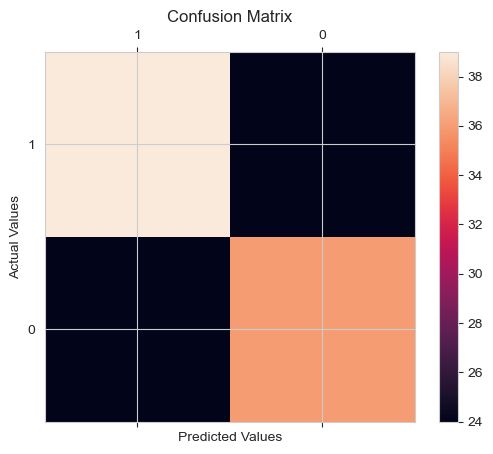

In [577]:
from sklearn.metrics import confusion_matrix
labels = [1,0]
matrix = confusion_matrix(y_test,knn_pred)
print(matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
plt.title('Confusion Matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [578]:
from sklearn.metrics import classification_report
report = classification_report(y_test,knn_pred)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        63
           1       0.60      0.60      0.60        60

    accuracy                           0.61       123
   macro avg       0.61      0.61      0.61       123
weighted avg       0.61      0.61      0.61       123



### Support Vector Machine (SVM)

In [600]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 

In [601]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['poly','sigmoid','linear']}

In [602]:
kernels = ['Polynomial','RBF','Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        return SVC(kernel='poly',degree=8,gamma="auto")
    elif ktype == 1:
        return SVC(kernel='rbf',gamma="auto")
    elif ktype == 2:
        return SVC(kernel='sigmoid',gamma="auto")
    elif ktype == 3:
        return SVC(kernel='linear',gamma="auto")

### ANN Performing the Feature scaling 

In [582]:
X_train["MOSQUITO1"] = X_train["MOSQUITO1"].astype(int)
X_test["MOSQUITO1"] = X_test["MOSQUITO1"].astype(int)
X_train

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
423,77.1,0,False,False,True,90.13,83.65,77.68,75.13,293.21,7,5.96,2,8,0,0
328,73.2,0,False,False,True,88.63,80.24,72.67,70.18,40.27,0,4.34,1,4,1,0
116,53.9,0,True,False,False,100.93,90.54,83.20,70.25,49.16,2,10.45,4,3,0,1
395,72.5,0,False,False,True,93.42,84.24,76.19,73.59,4.50,0,6.80,3,1,1,0
564,78.0,1,False,False,False,91.74,84.49,74.58,76.67,79.90,1,5.05,3,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,57.6,0,False,True,False,99.03,89.74,82.03,72.00,97.88,6,10.09,3,0,0,0
132,78.7,0,False,True,False,89.58,82.38,76.87,74.47,457.40,18,6.33,1,5,3,0
289,69.9,1,False,False,False,88.10,79.18,71.58,68.01,16.90,1,4.18,2,1,0,1
109,70.4,1,False,False,False,96.13,87.10,77.80,75.78,90.80,6,7.97,3,0,0,1


In [583]:
X_train["MOSQUITO2"] = X_train["MOSQUITO2"].astype(int)
X_test["MOSQUITO2"] = X_test["MOSQUITO2"].astype(int)
X_train

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
423,77.1,0,0,False,True,90.13,83.65,77.68,75.13,293.21,7,5.96,2,8,0,0
328,73.2,0,0,False,True,88.63,80.24,72.67,70.18,40.27,0,4.34,1,4,1,0
116,53.9,0,1,False,False,100.93,90.54,83.20,70.25,49.16,2,10.45,4,3,0,1
395,72.5,0,0,False,True,93.42,84.24,76.19,73.59,4.50,0,6.80,3,1,1,0
564,78.0,1,0,False,False,91.74,84.49,74.58,76.67,79.90,1,5.05,3,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,57.6,0,0,True,False,99.03,89.74,82.03,72.00,97.88,6,10.09,3,0,0,0
132,78.7,0,0,True,False,89.58,82.38,76.87,74.47,457.40,18,6.33,1,5,3,0
289,69.9,1,0,False,False,88.10,79.18,71.58,68.01,16.90,1,4.18,2,1,0,1
109,70.4,1,0,False,False,96.13,87.10,77.80,75.78,90.80,6,7.97,3,0,0,1


In [584]:
X_train["MOSQUITO3"] = X_train["MOSQUITO3"].astype(int)
X_test["MOSQUITO3"] = X_test["MOSQUITO3"].astype(int)
X_train

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
423,77.1,0,0,0,True,90.13,83.65,77.68,75.13,293.21,7,5.96,2,8,0,0
328,73.2,0,0,0,True,88.63,80.24,72.67,70.18,40.27,0,4.34,1,4,1,0
116,53.9,0,1,0,False,100.93,90.54,83.20,70.25,49.16,2,10.45,4,3,0,1
395,72.5,0,0,0,True,93.42,84.24,76.19,73.59,4.50,0,6.80,3,1,1,0
564,78.0,1,0,0,False,91.74,84.49,74.58,76.67,79.90,1,5.05,3,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,57.6,0,0,1,False,99.03,89.74,82.03,72.00,97.88,6,10.09,3,0,0,0
132,78.7,0,0,1,False,89.58,82.38,76.87,74.47,457.40,18,6.33,1,5,3,0
289,69.9,1,0,0,False,88.10,79.18,71.58,68.01,16.90,1,4.18,2,1,0,1
109,70.4,1,0,0,False,96.13,87.10,77.80,75.78,90.80,6,7.97,3,0,0,1


In [585]:
X_train["MOSQUITO4"] = X_train["MOSQUITO4"].astype(int)
X_test["MOSQUITO4"] = X_test["MOSQUITO4"].astype(int)
X_train

,HUMIDITY (%),MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),AGE CATEGORY,MALE,FEMALE,Pv
423,77.1,0,0,0,1,90.13,83.65,77.68,75.13,293.21,7,5.96,2,8,0,0
328,73.2,0,0,0,1,88.63,80.24,72.67,70.18,40.27,0,4.34,1,4,1,0
116,53.9,0,1,0,0,100.93,90.54,83.20,70.25,49.16,2,10.45,4,3,0,1
395,72.5,0,0,0,1,93.42,84.24,76.19,73.59,4.50,0,6.80,3,1,1,0
564,78.0,1,0,0,0,91.74,84.49,74.58,76.67,79.90,1,5.05,3,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,57.6,0,0,1,0,99.03,89.74,82.03,72.00,97.88,6,10.09,3,0,0,0
132,78.7,0,0,1,0,89.58,82.38,76.87,74.47,457.40,18,6.33,1,5,3,0
289,69.9,1,0,0,0,88.10,79.18,71.58,68.01,16.90,1,4.18,2,1,0,1
109,70.4,1,0,0,0,96.13,87.10,77.80,75.78,90.80,6,7.97,3,0,0,1


In [586]:
ann= tf.keras.models.Sequential()
# Creating hidden layers
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
##Adding the output layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [587]:
y_train = np.asarray(y_train)
y_train

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [588]:
#Fitting the ANN model
ann.fit(X_train,y_train,batch_size=32,epochs=120)

Epoch 1/120
16/16 [==============================] - 0s 1ms/step - loss: 9.2627 - accuracy: 0.4990
Epoch 2/120
16/16 [==============================] - 0s 1ms/step - loss: 5.9158 - accuracy: 0.5051
Epoch 3/120
16/16 [==============================] - 0s 1ms/step - loss: 3.3809 - accuracy: 0.5215
Epoch 4/120
16/16 [==============================] - 0s 1ms/step - loss: 2.2046 - accuracy: 0.5153
Epoch 5/120
16/16 [==============================] - 0s 1ms/step - loss: 1.8994 - accuracy: 0.5440
Epoch 6/120
16/16 [==============================] - 0s 1ms/step - loss: 1.7572 - accuracy: 0.5481
Epoch 7/120
16/16 [==============================] - 0s 1ms/step - loss: 1.6244 - accuracy: 0.5317
Epoch 8/120
16/16 [==============================] - 0s 1ms/step - loss: 1.5206 - accuracy: 0.5337
Epoch 9/120
16/16 [==============================] - 0s 899us/step - loss: 1.3834 - accuracy: 0.5358
Epoch 10/120
16/16 [==============================] - 0s 967us/step - loss: 1.2791 - accuracy: 0.5378
Epoch

In [589]:
#predict the model
ann_pred = ann.predict(X_test)
ann_pred = (ann_pred > 0.5)
ann_pred

4/4 [==============================] - 0s 1ms/step


array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [590]:
y_test

18     0
382    1
112    1
98     0
364    1
      ..
170    0
188    1
42     0
603    1
102    0
Name: indigenious, Length: 123, dtype: uint8

Text(0.5, 0, 'epoch')

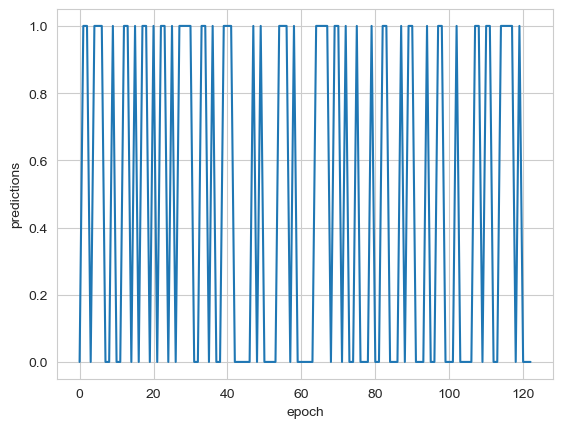

In [599]:
#acc = accuracy_score(y_test,ann_pred)
#acc

plt.plot(ann_pred)
plt.ylabel('predictions')
plt.xlabel('epoch')

In [592]:
from sklearn.metrics import classification_report
report = classification_report(y_test,ann_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       1.00      0.97      0.98        60

    accuracy                           0.98       123
   macro avg       0.98      0.98      0.98       123
weighted avg       0.98      0.98      0.98       123



## RNN

In [593]:
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

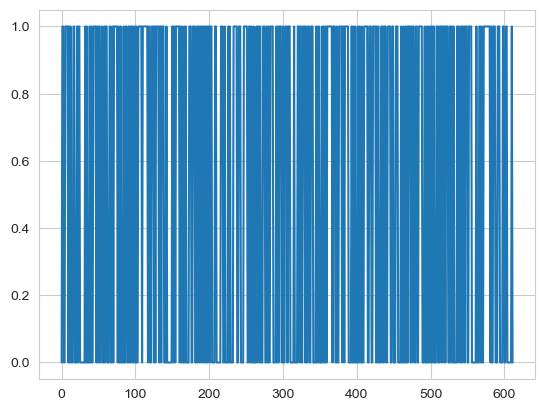

In [594]:
plt.plot(malaria_df["indigenious"])

In [595]:
model = Sequential()
model.add(LSTM(8, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam')

## OLS



RNN
ADAPBOOST
XGBOOST